In [1]:
import pandas as pd
import sqlite3

In [4]:
connect=sqlite3.connect('../data/checking-logs.sqlite', check_same_thread=False)

In [5]:
pd.io.sql.read_sql('select * from pageviews limit 10', connect)

,index,uid,datetime
0,0,admin_1,2020-04-17 12:01:08.463179
1,1,admin_1,2020-04-17 12:01:23.743946
2,2,admin_3,2020-04-17 12:17:39.287778
3,3,admin_3,2020-04-17 12:17:40.001768
4,4,admin_1,2020-04-17 12:27:30.646665
5,5,admin_1,2020-04-17 12:35:44.884757
6,6,admin_1,2020-04-17 12:35:52.735016
7,7,admin_3,2020-04-17 12:36:21.401412
8,8,admin_3,2020-04-17 12:36:22.023355
9,9,admin_1,2020-04-17 13:55:19.129243


In [6]:
df=pd.io.sql.read_sql('select * from pageviews where uid not like "admin_%" ', connect, parse_dates=['datetime'])
df

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [7]:
views=df.groupby(df['datetime'].dt.date).agg({'uid':['count']})
views=views.reset_index()
views.columns=['datetime', 'views']
views.head()

,datetime,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


<Axes: title={'center': 'Views per day'}, xlabel='datetime'>

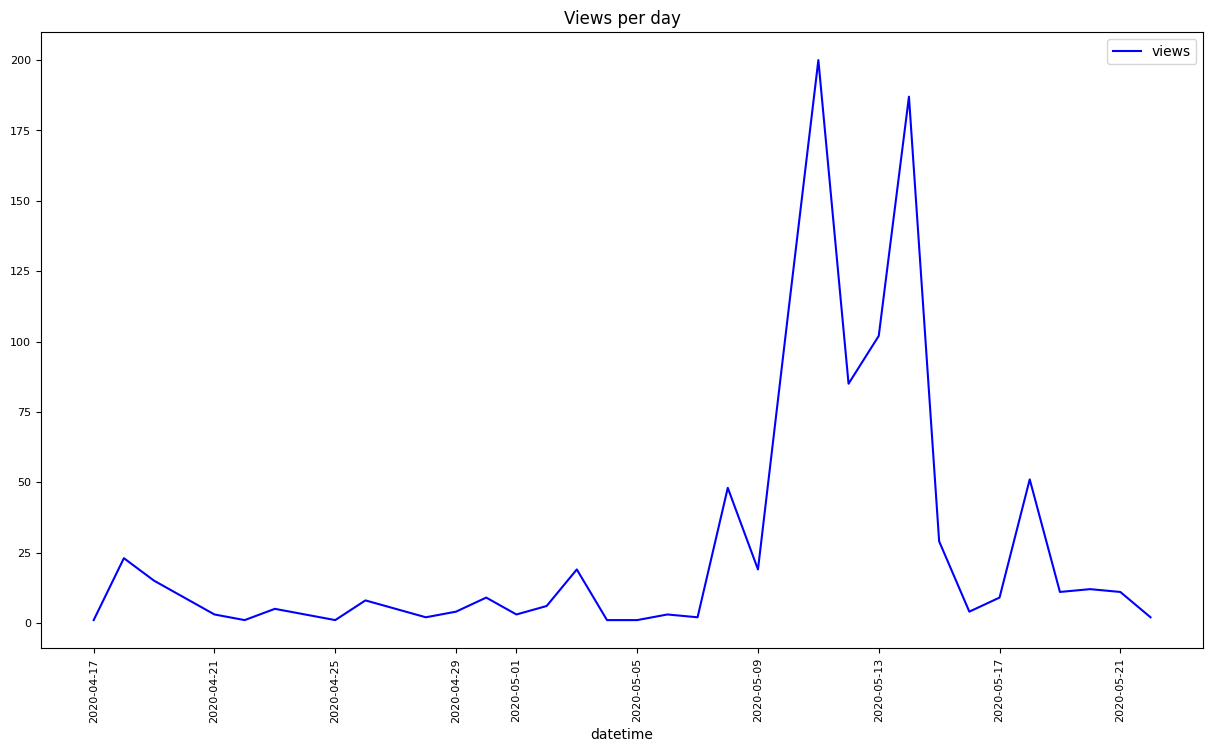

In [8]:
views.plot(kind='line', x='datetime', y='views', fontsize=8, figsize=(15,8), title='Views per day', rot=90, color='blue')

In [9]:
connect.close()